In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### >> 사용할 library

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

---
# 1. Dataset
---

### >> 사용할 데이터셋 : 5가지 라벨링

*   answer : 설문조사 응답
*   label : 긍부정 라벨링 (0, 0.3, 0.5, 0.7, 1)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/보아즈_프로젝트/스토커/데이터/labeling5.csv', encoding='utf-8')
df = df.iloc[:, [0, 6]]
df.head(5)

,answer,나현
0,왕,0.5
1,무슨 일 있었오? ㅠ,0.0
2,왜 우울한지 물어본다,0.0
3,왜 우울하니?,0.0
4,무슨일이니~,0.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   answer  1269 non-null   object 
 1   나현      1269 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.0+ KB


In [6]:
# 컬럼명 변경
df.rename(columns = {'나현':'label'} , inplace = True)

# 중복제거
df = df.drop_duplicates(['answer','label'])

#### 데이터 결측치와 shape 확인

In [15]:
print(df.isnull().sum())
print(df.shape)

answer    0
label     0
dtype: int64
(1095, 2)


#### 라벨별 데이터 수

< The number of label >
- The number of data :  1095
- The number of target 1 (Yse)  :  330
- The number of target 1 (Yse)  :  132
- The number of target 1 (Yse)  :  96
- The number of target 1 (Yse)  :  111
- The number of target 0 (No) :  426


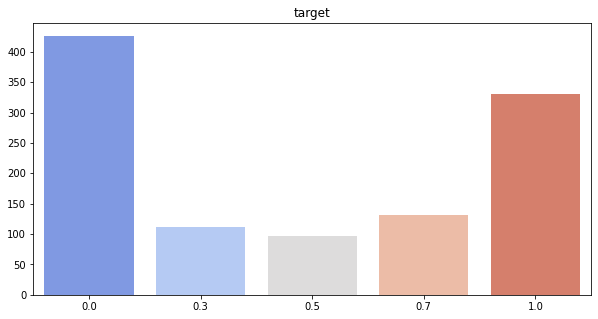

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(df['label'] , palette='coolwarm', alpha=1.0); plt.xlabel(''), plt.ylabel(''); plt.title('target');
print("< The number of label >")
print(f"- The number of data :  {len(df)}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 1])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.7])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.5])}")
print(f"- The number of target 1 (Yse)  :  {len(df[df['label'] == 0.3])}")
print(f"- The number of target 0 (No) :  {len(df[df['label'] == 0])}")

#### 문장 예시

In [20]:
for ans in df['answer'][:20]:
  print(ans)

왕
무슨 일 있었오? ㅠ
왜 우울한지 물어본다
왜 우울하니?
무슨일이니~
염색 색깔뭐야
잘했네
이쁘다
왜 우울해?
이쁘네
염색한 것도 잘 어울리네
잘했어
헐~
왜우울해 ㅠㅠㅜㅜ
염색? 이쁘네 근데 왜 우울해?
무슨일잇음?
우울한데 왜 염색을 해
잘했어  예쁘네~
너랑 잘어울려
무슨색이야?
